In [1]:
%pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "./input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#reading in CSV's from a file path
train_df = pd.read_csv('mentalhealthdata.csv')


#Pandas: whats the data row count?
print(train_df.shape)

#Pandas: whats the distribution of the data?
print(train_df.describe())

#Pandas: What types of data do i have?
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [3]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "./input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#reading in CSV's from a file path
train_df = pd.read_csv('mentalhealthdata.csv')


#Pandas: whats the data row count?
print(train_df.shape)

#Pandas: whats the distribution of the data?
print(train_df.describe())

#Pandas: What types of data do i have?
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [5]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
Gender                         0  0.000000
Timestamp                      0  0.000000
Age                            0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
Country                        0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
wellness_program               0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
supervisor                     0  0.000000
coworkers  

In [6]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state” just to make our lives easier.
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [7]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [8]:
#clean 'Gender'
#Slower case all columm's elements
gender = train_df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = train_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())


['female' 'male' 'trans']


In [9]:
#complete missing age with mean
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [10]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [11]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [12]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(60), np.int64(61), np.int64(62), np.int64(65), np.int64(72)]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Mo

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [13]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
mental_vs_physical             0      0.0
obs_consequence                0  

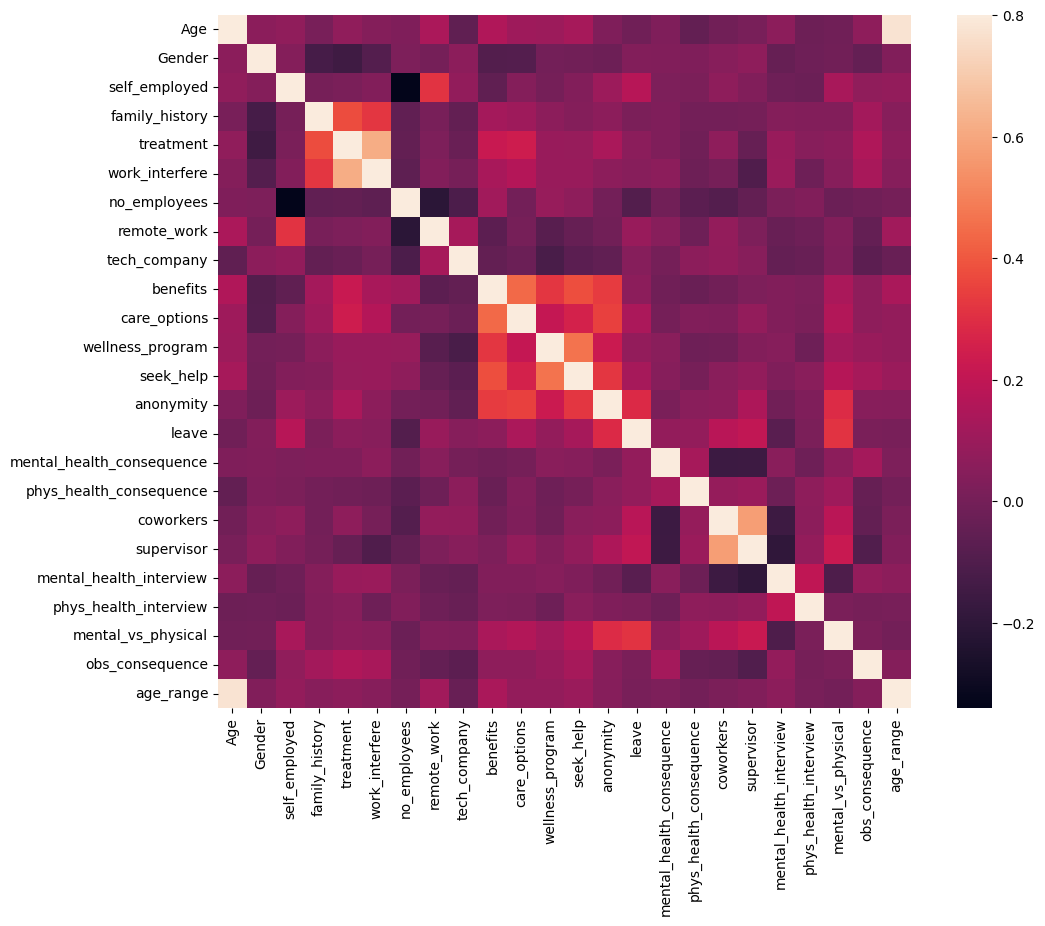

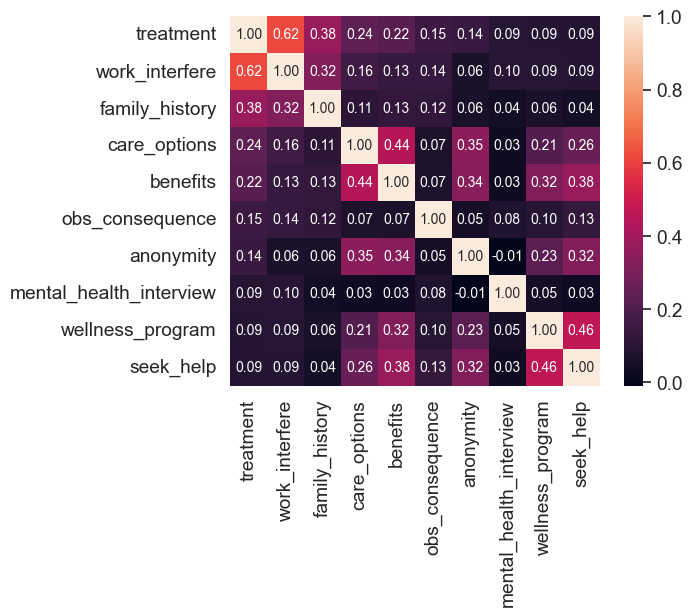

In [14]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
# Processing age
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan

train_df['Age'] = train_df['Age'].apply(age_process)

In [16]:
(train_df['Age']<0).sum()

np.int64(0)

In [17]:
(train_df['Age']>100).sum()

np.int64(0)

In [18]:
(train_df['Age']<60).sum()

np.int64(1257)

In [19]:
train_df['Age'].isnull().sum()

np.int64(0)

C:\Users\OGS\AppData\Local\Temp\ipykernel_19580\2516591640.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"], bins=24)


Text(0.5, 0, 'Age')

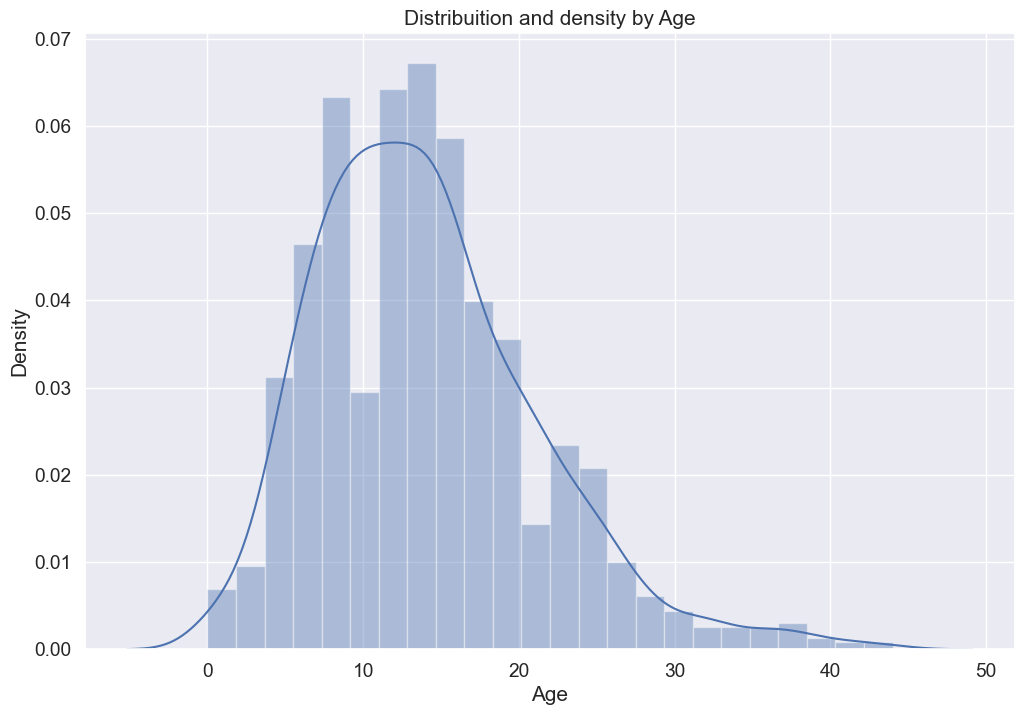

In [20]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

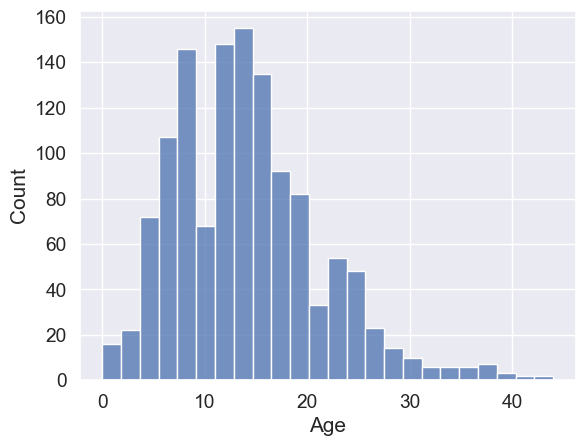

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histogram
sns.histplot(train_df["Age"], bins=24)

# Show plot
plt.show()


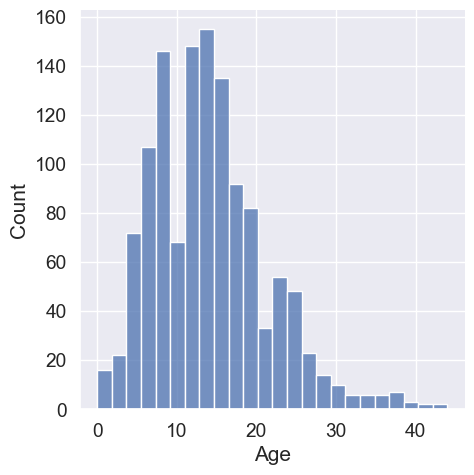

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create distribution plot
sns.displot(train_df["Age"], bins=24, kde=False)  # kde=False to only show the histogram

# Show plot
plt.show()


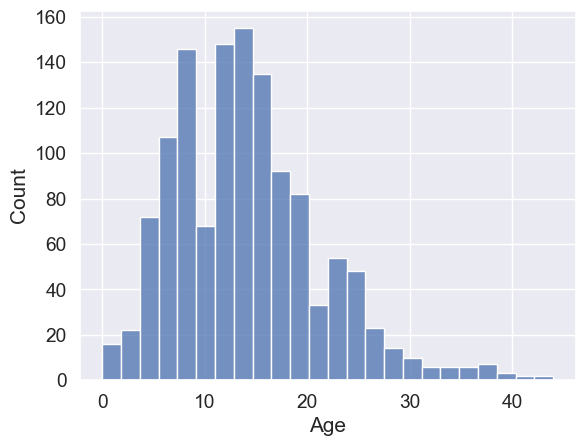

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histogram
sns.histplot(train_df["Age"], bins=24)

# Show plot
plt.show()


In [24]:
# Age vs Family-History
train_df['Age_Group'] = pd.cut(train_df['Age'].dropna(),
                        [0, 18, 25, 35, 45, 99],
                        labels=['<18','18-24','25-34','35-44','45+'])

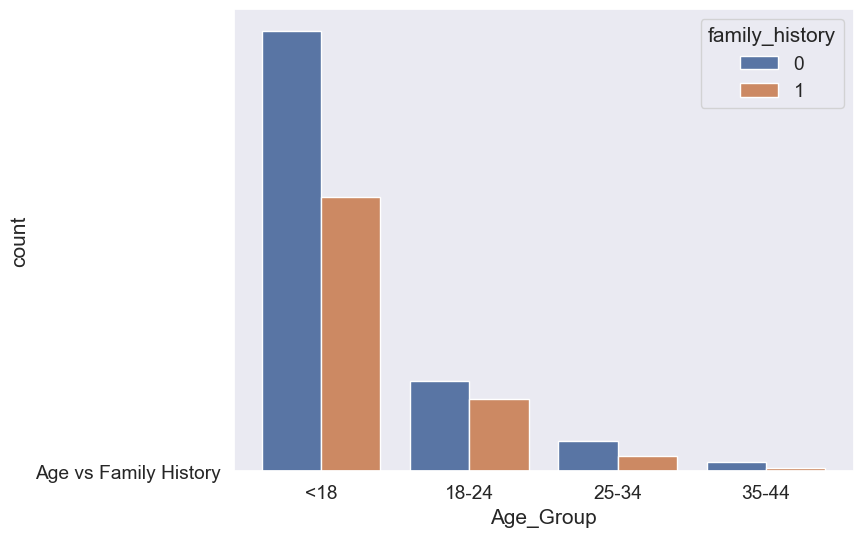

In [25]:
fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=train_df, x = 'Age_Group', hue = 'family_history', ax = ax)
plt.plot('Age vs Family History')

Text(0.5, 1.0, 'Age Group vs Treatment')

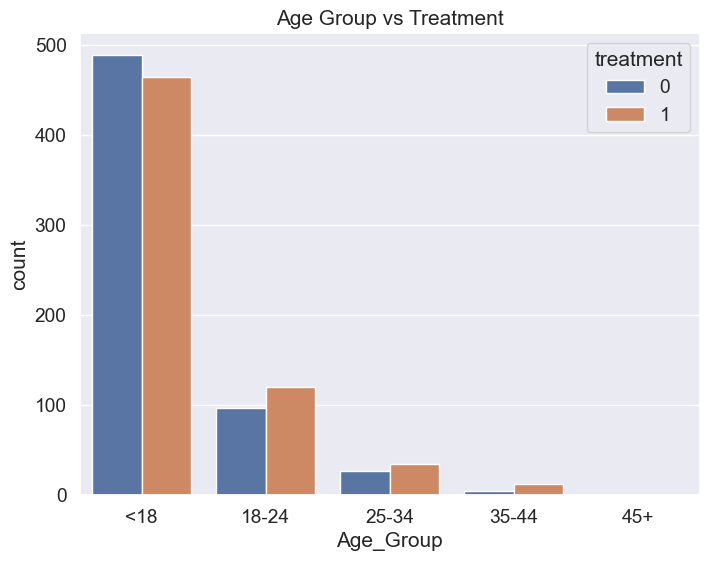

In [26]:
#Age group vs Treatment
fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data = train_df, x = 'Age_Group', hue='treatment')
plt.title('Age Group vs Treatment')

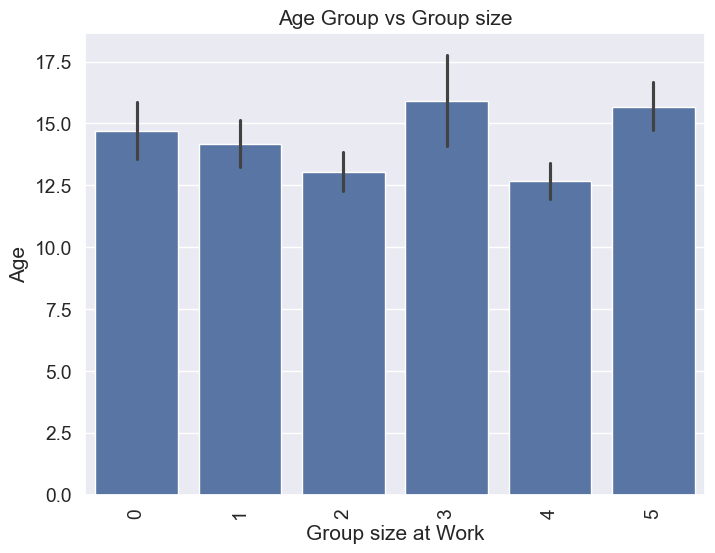

In [27]:
#Age vs No. of Employees
fig,ax = plt.subplots(figsize=(8, 6))
sns.barplot(data = train_df, x =  train_df['no_employees'], y = train_df['Age'], ax = ax)
plt.title('Age Group vs Group size')
plt.xlabel('Group size at Work')
plt.ylabel('Age')
ticks = plt.setp(ax.get_xticklabels(), rotation=90)

Text(0.5, 0, 'employee group')

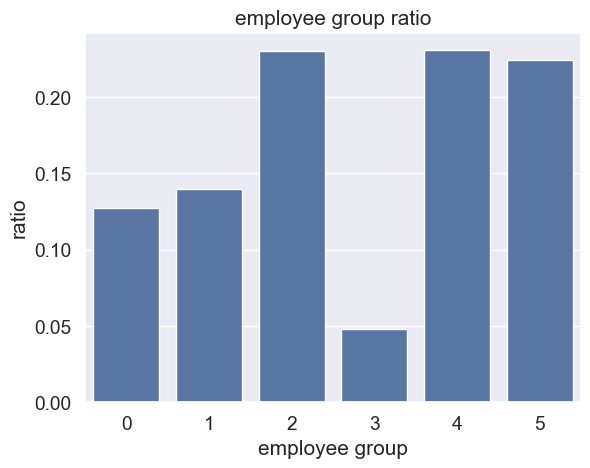

In [28]:
total = train_df['no_employees'].dropna().shape[0] * 1.0
employee_count  = Counter(train_df['no_employees'].dropna().tolist())
for key,val in employee_count.items():
    employee_count[key] = employee_count[key] / total
employee_group = np.asarray(list(employee_count.keys()))
employee_val = np.asarray(list(employee_count.values()))
sns.barplot(x = employee_group , y = employee_val)
plt.title('employee group ratio')
plt.ylabel('ratio')
plt.xlabel('employee group')


Text(0.5, 1.0, 'no_employee vs tech_company')

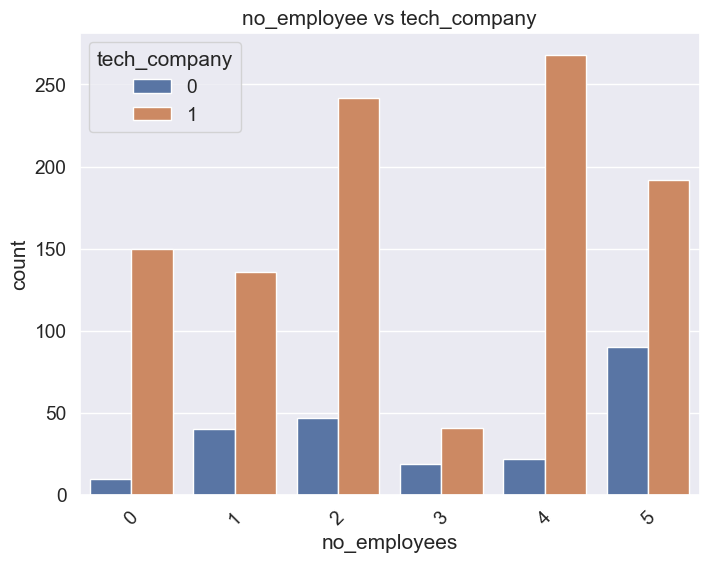

In [29]:
fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=train_df, x='no_employees', hue='tech_company', ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('no_employee vs tech_company')

Text(0.5, 1.0, 'No. Employees vs Remote Work')

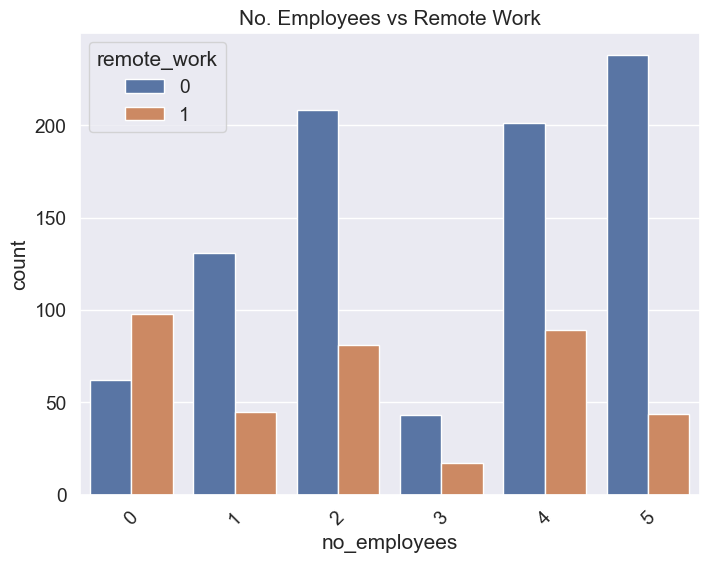

In [30]:
# Remote Work vs employee grp
fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data = train_df, x = 'no_employees', hue = 'remote_work', ax=ax)
ticks = plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('No. Employees vs Remote Work')

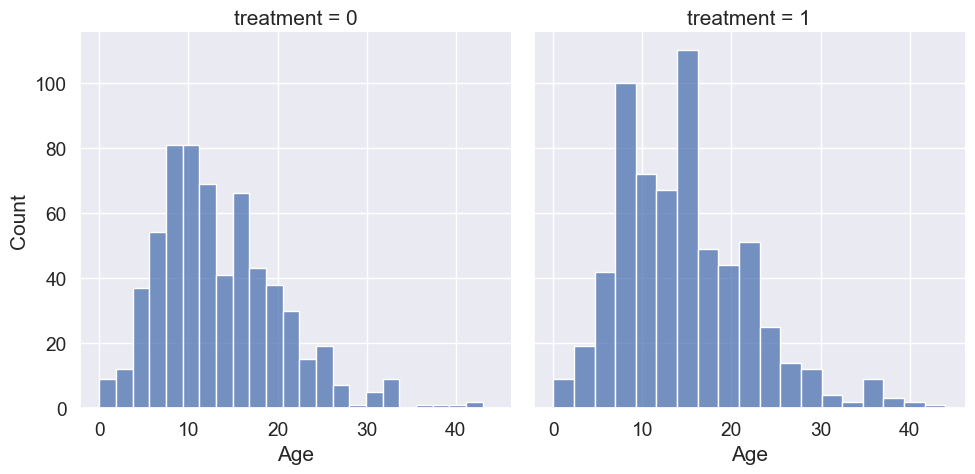

In [31]:
g = sns.FacetGrid(train_df, col='treatment', height=5)
g = g.map(sns.histplot, "Age")  # Use histplot instead of distplot

C:\Users\OGS\AppData\Local\Temp\ipykernel_19580\4241817925.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels)


Text(0.5, 1.0, 'Total Distribuition by treated or not')

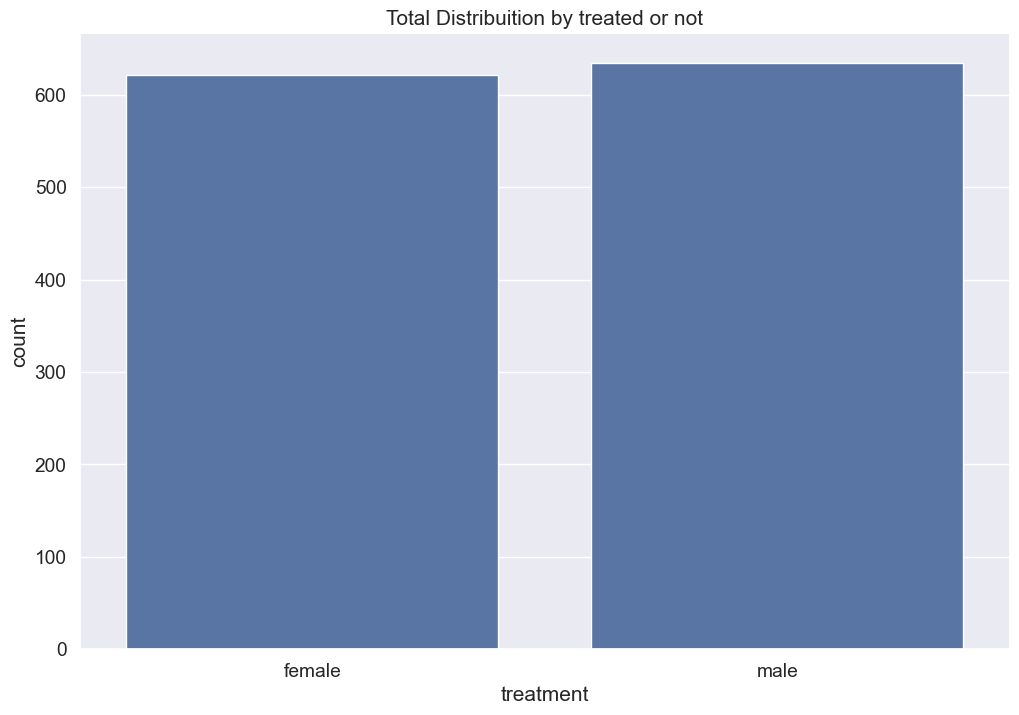

In [32]:
# Let see how many people has been treated
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=train_df)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

C:\Users\OGS\AppData\Local\Temp\ipykernel_19580\2522911586.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


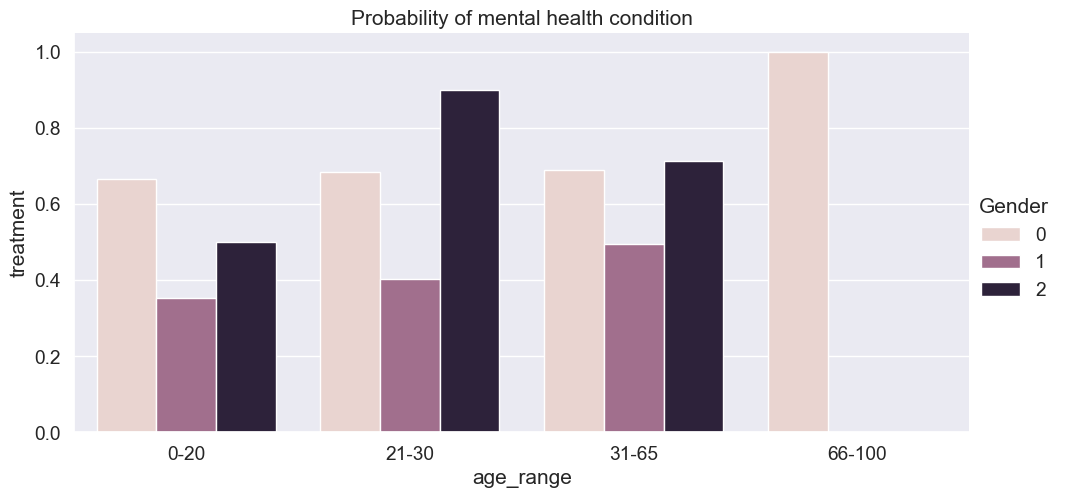

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'labelDict' and 'train_df' are already defined and 'age_range' and 'treatment' are valid columns

# Define label dictionary for x-axis ticks
o = labelDict['label_age_range']

# Create categorical plot
g = sns.catplot(
    x="age_range",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    ci=None,
    height=5,
    aspect=2,
    legend_out=True
)

# Set x-axis tick labels
g.set_xticklabels(o)

# Set plot title
plt.title('Probability of mental health condition')

# Show plot
plt.show()


C:\Users\OGS\AppData\Local\Temp\ipykernel_19580\2584047231.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


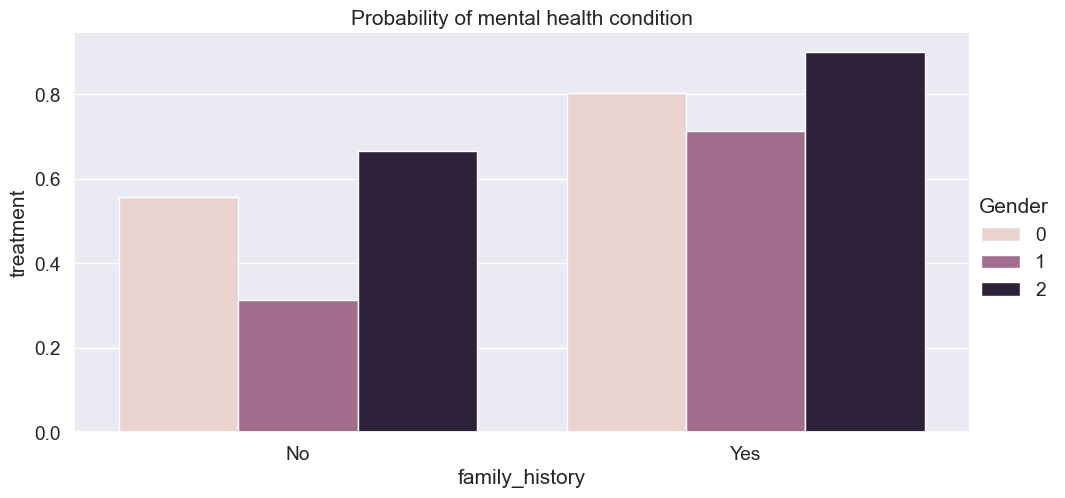

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'labelDict' and 'train_df' are already defined and 'family_history' and 'treatment' are valid columns

# Define label dictionary for x-axis ticks
o = labelDict['label_family_history']

# Create categorical plot
g = sns.catplot(
    x="family_history",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    ci=None,
    height=5,
    aspect=2,
    legend_out=True
)

# Set x-axis tick labels
g.set_xticklabels(o)

# Set plot title
plt.title('Probability of mental health condition')

# Show plot
plt.show()


C:\Users\OGS\AppData\Local\Temp\ipykernel_19580\4294880251.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


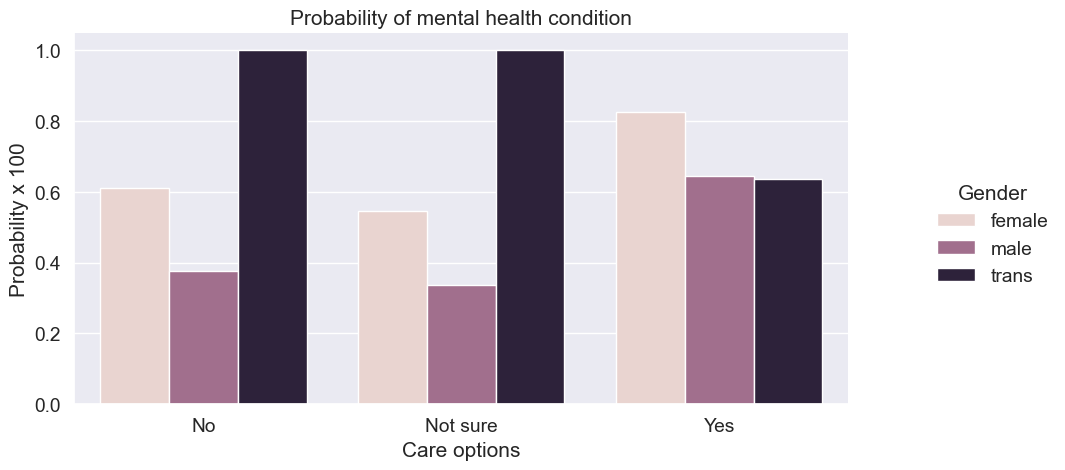

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define label dictionary for x-axis ticks
o = labelDict['label_care_options']

# Create categorical plot using catplot
g = sns.catplot(
    x="care_options",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    ci=None,
    height=5,
    aspect=2,
    legend_out=True
)

# Set x-axis tick labels
g.set_xticklabels(o)

# Set plot titles and labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

# Show plot
plt.show()


C:\Users\OGS\AppData\Local\Temp\ipykernel_19580\494696602.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
c:\Users\OGS\OneDrive\Desktop\sentiment_analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


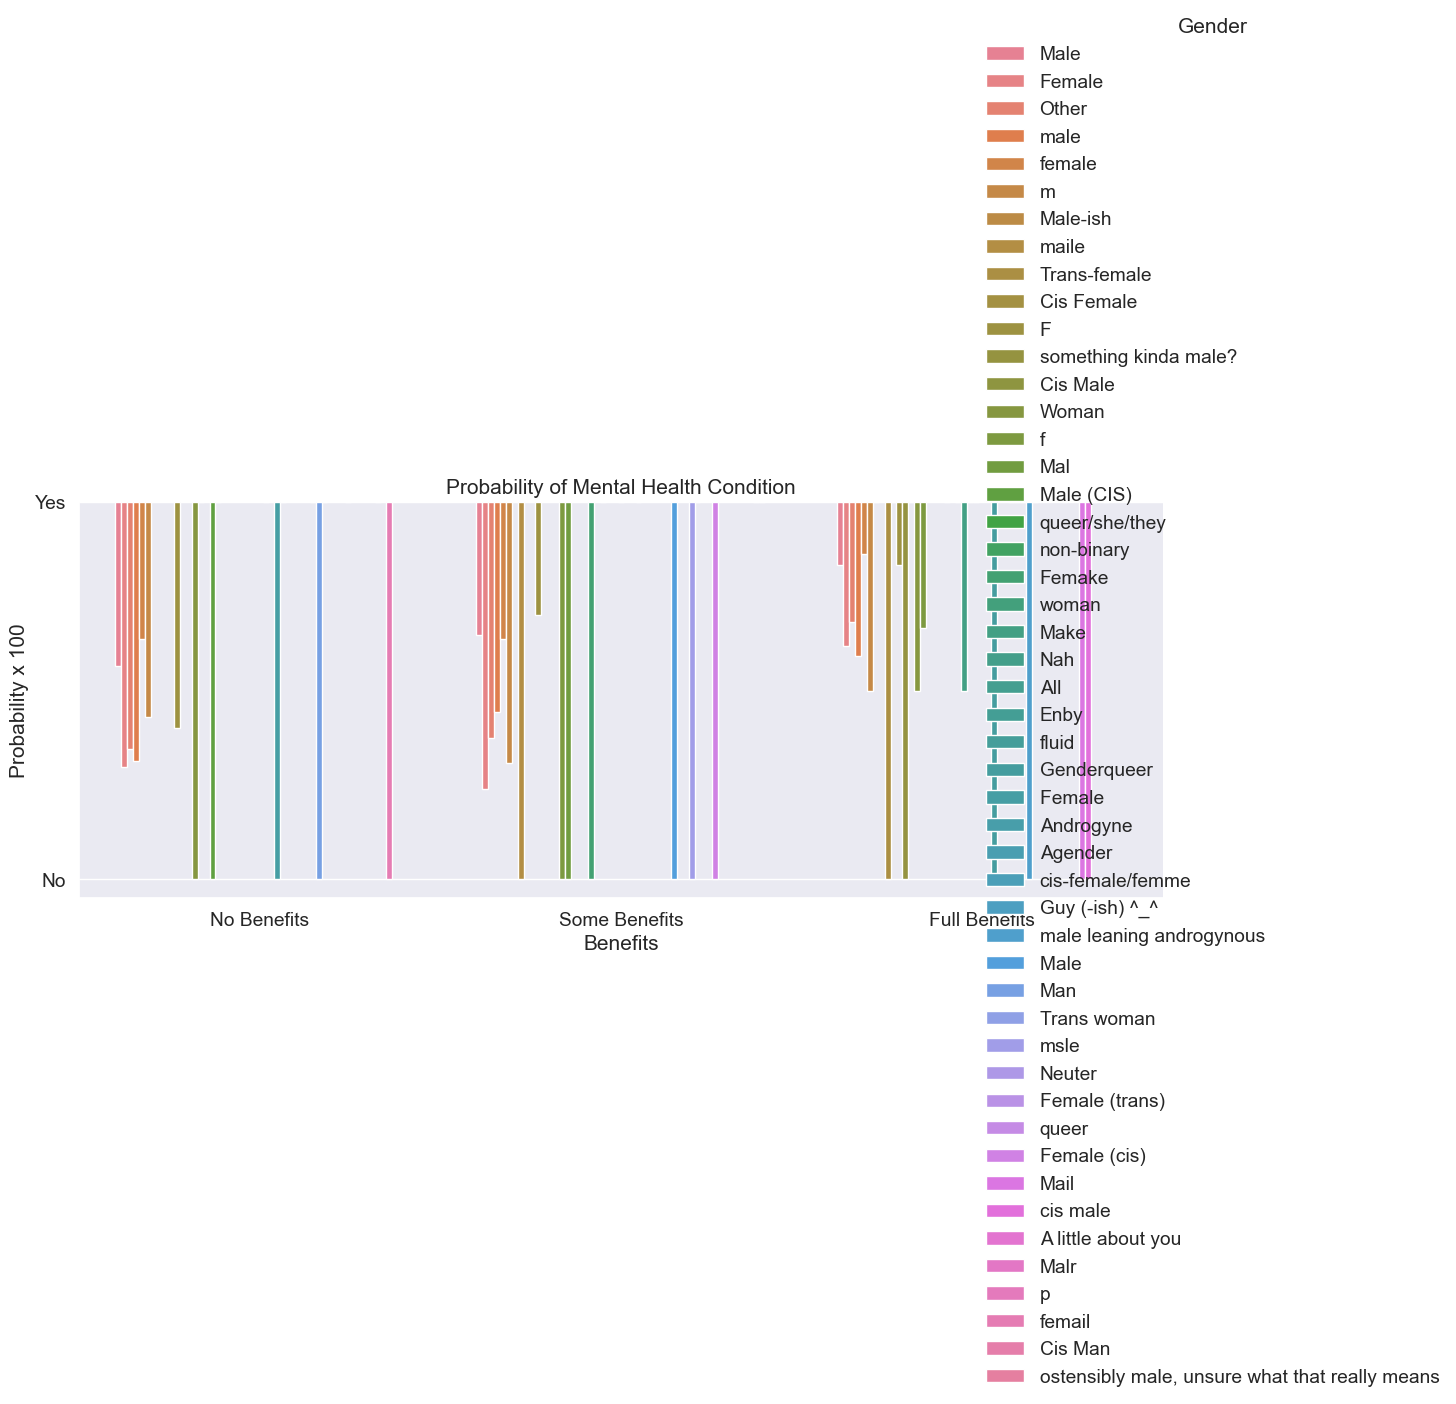

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('mentalhealthdata.csv')  # Adjust the path as necessary

# Define the label dictionary
labelDict = {
    'label_benefits': ['No Benefits', 'Some Benefits', 'Full Benefits'],  # Adjust as needed
    'label_Gender': ['Male', 'Female', 'Other']  # Adjust according to your data
}

# Extract labels
o = labelDict['label_benefits']

# Create the plot using catplot
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

In [37]:
%pip install seaborn==0.10.1

  Using cached seaborn-0.10.1-py3-none-any.whl.metadata (2.3 kB)
Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2
Note: you may need to restart the kernel to use updated packages.


c:\Users\OGS\OneDrive\Desktop\sentiment_analysis\.venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


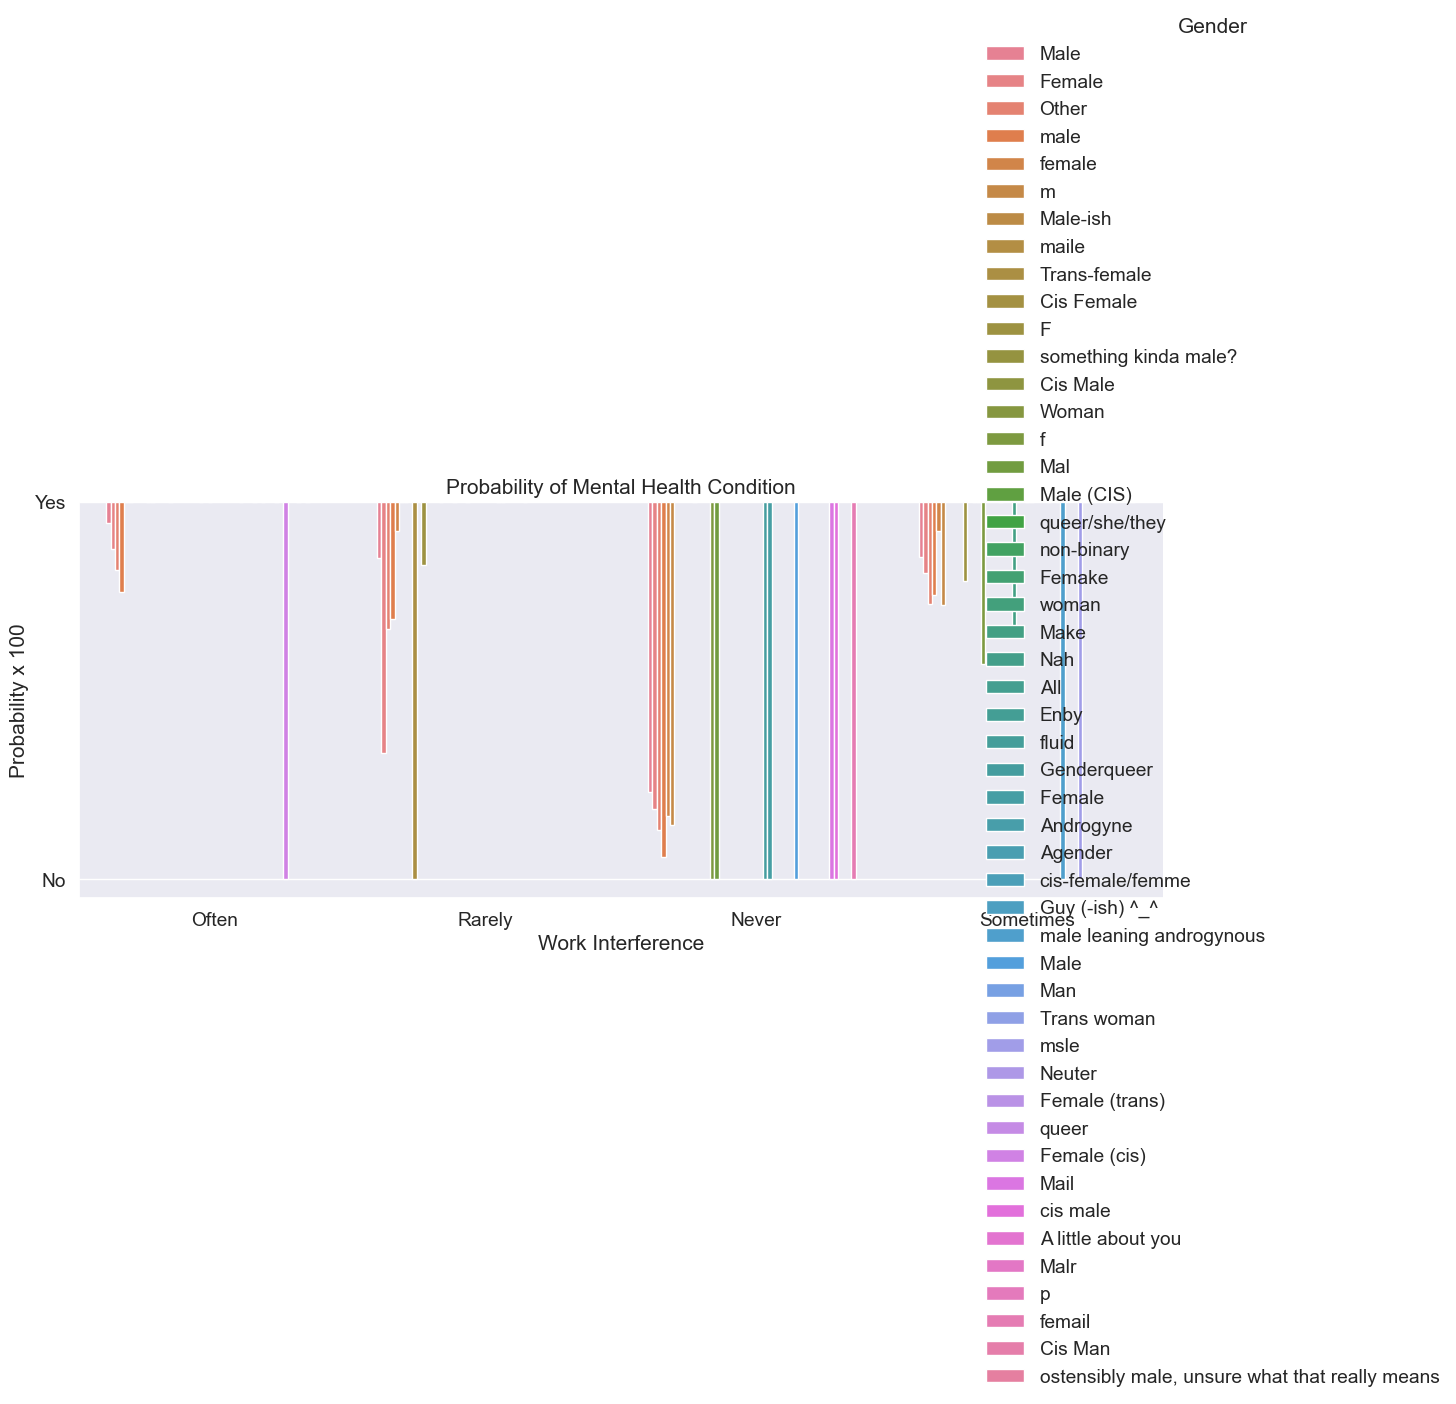

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
train_df = pd.read_csv('mentalhealthdata.csv')  # Adjust the path as necessary

# Define your labels
labelDict = {
    'label_benefits': ['No Benefits', 'Some Benefits', 'Full Benefits'],  # Adjust as needed
    'label_Gender': ['Male', 'Female', 'Other'],  # Adjust according to your data
    'label_work_interfere': ['Does not interfere', 'Some interference', 'Very much interferes']  # Adjust as needed
}

# Extract labels
o = labelDict['label_work_interfere']

# Create the plot using catplot
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", errorbar=None, height=5, aspect=2)

# Check the number of unique categories in 'work_interfere'
unique_categories = train_df['work_interfere'].unique()

# Set x-tick labels only if the number of labels matches the number of unique categories
if len(unique_categories) == len(o):
    g.set_xticklabels(o)
else:
    print(f"Warning: Number of unique categories ({len(unique_categories)}) does not match number of labels ({len(o)}).")

plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work Interference')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

In [39]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,1.763000e-08,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,1.770000e-08,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,1.758000e-08,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,1.757000e-08,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,1.757000e-08,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [40]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the 'Age' column
train_df['Age'] = scaler.fit_transform(train_df[['Age']])

# Check the first few rows of the dataframe to confirm changes
train_df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,1.763000e-08,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,1.770000e-08,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,1.758000e-08,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,1.757000e-08,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,1.757000e-08,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [41]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

In [42]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


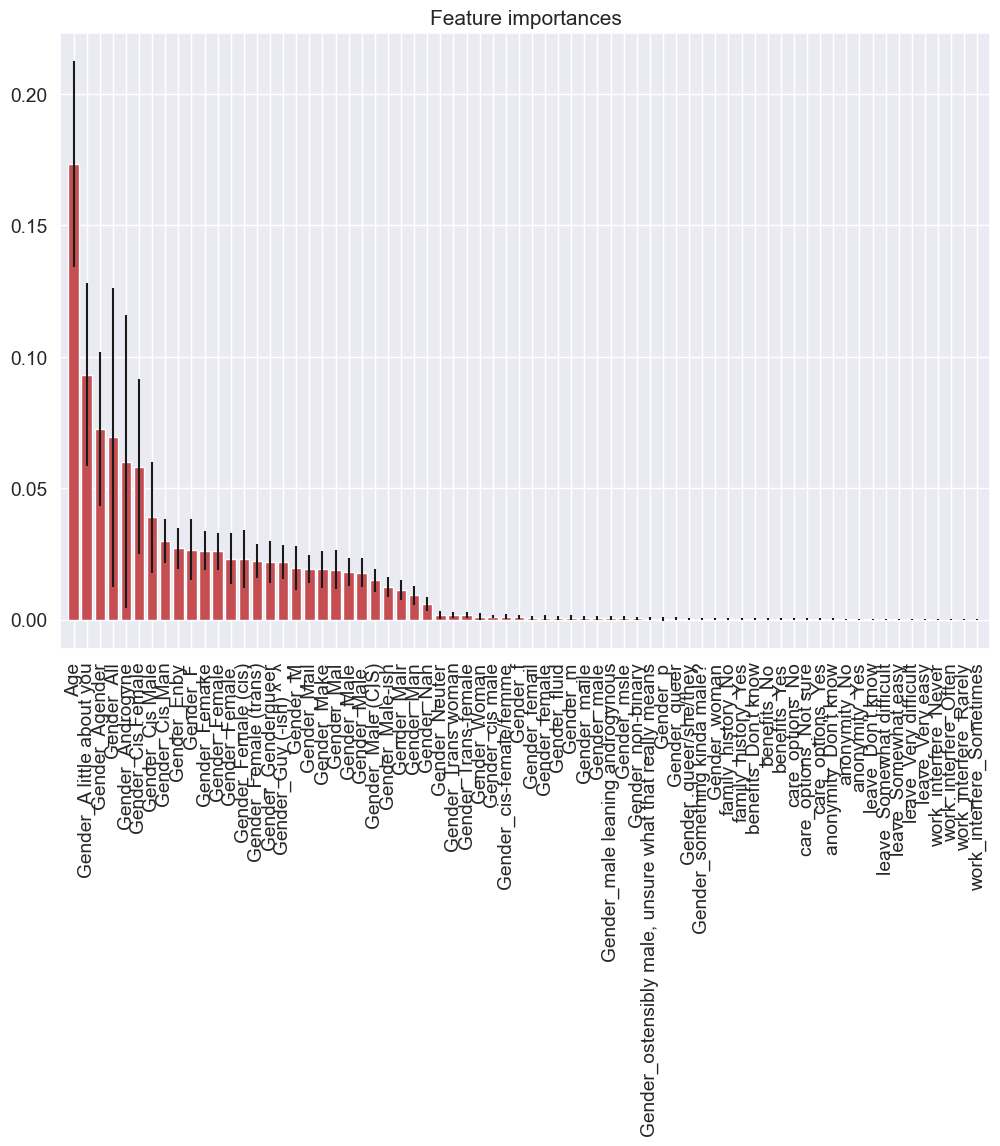

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

# Example for converting categorical data to numeric
# Assuming `X` is a DataFrame

# Convert categorical columns to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Initialize the classifier
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

# Fit the model
forest.fit(X_encoded, y)

# Compute feature importances
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Prepare labels for plotting
labels = [X_encoded.columns[f] for f in range(X_encoded.shape[1])]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_encoded.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_encoded.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X_encoded.shape[1]])
plt.show()


In [44]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())

    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())

    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())

    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making

    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)

    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))


    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]

    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)

        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')


    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, 0.3)[0]

    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################

    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!


    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)



    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)



    return accuracy

In [45]:
##########################################
# Tuning with cross validation score
##########################################
def tuningCV(knn):

    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [46]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)

    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)

    # view the complete results (list of named tuples)
    grid.cv_results_

    # examine the first tuple
    print(grid.cv_results_[0].parameters)
    print(grid.cv_results_[0].cv_validation_scores)
    print(grid.cv_results_[0].mean_validation_score)

    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.cv_results_]
    print(grid_mean_scores)

    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [47]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_

    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [48]:
def tuningMultParam(knn):

    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid)

    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)

    # view the complete results
    print(grid.cv_results_)

    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

In [49]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)

    print('########### Logistic Regression ###############')

    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your data into a DataFrame
# Replace 'your_data.csv' with your actual data file
df = pd.read_csv('mentalhealthdata.csv')

# Print column names to check for the target column
print(df.columns)

def preprocess_data(df, target_column):
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Identify categorical columns
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features)
        ],
        remainder='passthrough'
    )

    # Apply transformations to features
    X_encoded = preprocessor.fit_transform(X)

    # Encode target labels if necessary
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    return X_encoded, y_encoded

def logisticRegression(X_train, X_test, y_train, y_test, methodDict):
    # Train a logistic regression model on the training set
    logreg = LogisticRegression(max_iter=1000)  # Ensure convergence with max_iter
    logreg.fit(X_train, y_train)

    # Make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)

    print('########### Logistic Regression ###############')

    # Evaluate the model and get the accuracy score
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Data for final graph
    methodDict['Log. Regres.'] = accuracy * 100

# Use the correct column name for the target
target_column_name = 'correct_target_column_name'  # Replace with your actual target column name

# Preprocess the data
X, y = preprocess_data(df, target_column_name)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize methodDict
methodDict = {}

# Call the function
logisticRegression(X_train, X_test, y_train, y_test, methodDict)

# Print the accuracy
print(methodDict)


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


KeyError: "['correct_target_column_name'] not found in axis"

In [ ]:
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv('mentalhealthdata.csv')  # Replace 'your_data.csv' with your actual data file

# Print column names
print("Column names:", df.columns)


Column names: Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your data into a DataFrame
df = pd.read_csv('mentalhealthdata.csv')  # Replace with your actual data file

# Print column names to identify the correct target column name
print("Column names:", df.columns)

def preprocess_data(df, target_column):
    # Check if the target column exists in the DataFrame
    if target_column not in df.columns:
        raise KeyError(f"Column '{target_column}' not found in DataFrame columns: {df.columns}")

    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Identify categorical columns
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features)
        ],
        remainder='passthrough'
    )

    # Apply transformations to features
    X_encoded = preprocessor.fit_transform(X)

    # Encode target labels if necessary
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    return X_encoded, y_encoded

def logisticRegression(X_train, X_test, y_train, y_test, methodDict):
    # Train a logistic regression model on the training set
    logreg = LogisticRegression(max_iter=1000)  # Ensure convergence with max_iter
    logreg.fit(X_train, y_train)

    # Make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)

    print('########### Logistic Regression ###############')

    # Evaluate the model and get the accuracy score
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Data for final graph
    methodDict['Log. Regres.'] = accuracy * 100

# Use the correct column name for the target
target_column_name = 'mental_health_consequence'  # Replace with the actual column name

# Preprocess the data
X, y = preprocess_data(df, target_column_name)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize methodDict
methodDict = {}

# Call the function
logisticRegression(X_train, X_test, y_train, y_test, methodDict)

# Print the accuracy
print(methodDict)


Column names: Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
########### Logistic Regression ###############
Accuracy: 64.81%
{'Log. Regres.': 64.81481481481481}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)

    # From https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)

    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)

    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)

    print('########### KNeighborsClassifier ###############')
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['KNN'] = accuracy_score * 100

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def Knn(X_train, X_test, y_train, y_test, methodDict):
    # Initialize the KNeighborsClassifier with a default value of k
    knn = KNeighborsClassifier(n_neighbors=5)

    # Fit the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred_class = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_class)

    print('########### K-Nearest Neighbors ###############')
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Data for final graph
    methodDict['KNN'] = accuracy * 100

# Example usage
# Assuming X_train, X_test, y_train, y_test are already defined
methodDict = {}
Knn(X_train, X_test, y_train, y_test, methodDict)
print(methodDict)


########### K-Nearest Neighbors ###############
Accuracy: 54.23%
{'KNN': 54.232804232804234}


In [ ]:
results=[]
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)

    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    results = pd.DataFrame({'Index': X_test.index, 'Treatment': y_pred_class})

    print('********************Results********************')
    print(results)
    results.to_csv('results.csv', index=False)

    print('########### Random Forests ###############')

    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pandas as pd


In [ ]:
def randomForest(X_train, X_test, y_train, y_test, methodDict):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import RandomizedSearchCV
    from scipy.stats import randint
    import pandas as pd

    # Initialize the RandomForestClassifier with default parameters
    forest = RandomForestClassifier()

    # Determine the number of features
    featuresSize = len(feature_cols)

    # Define the parameter grid for RandomizedSearchCV
    param_dist = {
        "n_estimators": [10, 20, 50, 100],  # Include different values for n_estimators
        "max_depth": [3, None],
        "max_features": randint(1, featuresSize),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }

    # Perform RandomizedSearchCV
    tuning = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=10, cv=5, random_state=1)
    tuning.fit(X_train, y_train)

    # Get the best parameters
    best_params = tuning.best_params_
    print(f"Best Parameters: {best_params}")

    # Build and fit the model with the best parameters
    best_forest = RandomForestClassifier(
        n_estimators=best_params.get('n_estimators', 100),  # Use .get() to provide a default value
        max_depth=best_params.get('max_depth', None),
        max_features=best_params.get('max_features', 'auto'),
        min_samples_split=best_params.get('min_samples_split', 2),
        min_samples_leaf=best_params.get('min_samples_leaf', 1),
        criterion=best_params.get('criterion', 'gini'),
        random_state=1
    )
    my_forest = best_forest.fit(X_train, y_train)

    # Make predictions
    y_pred_class = my_forest.predict(X_test)

    # Create a DataFrame for the results
    results = pd.DataFrame({
        'Index': range(len(y_pred_class)),  # Use range for indices
        'Treatment': y_pred_class
    })

    print('********************Results********************')
    print(results)
    results.to_csv('results.csv', index=False)

    print('########### Random Forests ###############')

    # Evaluate the model
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    # Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

# Example usage
# Assuming X_train, X_test, y_train, y_test are already defined and feature_cols is defined
methodDict = {}
randomForest(X_train, X_test, y_train, y_test, methodDict)
print(methodDict)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
********************Results********************
     Index  Treatment
0        0          1
1        1          1
2        2          0
3        3          1
4        4          1
..     ...        ...
373    373          0
374    374          0
375    375          2
376    376          0
377    377          1

[378 rows x 2 columns]
########### Random Forests ###############
Accuracy: 0.6111111111111112


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
from sklearn import metrics  # Import metrics from sklearn

def evalClassModel(model, y_test, y_pred_class, plot=False):
    # Classification accuracy: percentage of correct predictions
    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Accuracy:', accuracy)

    # Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # Examine the class distribution of the testing set (using a Pandas Series method)
    null_accuracy = y_test.value_counts().max() / len(y_test)
    print('Null accuracy:', null_accuracy)

    if plot:
        # Plot confusion matrix if needed
        import matplotlib.pyplot as plt
        from sklearn.metrics import ConfusionMatrixDisplay

        cm = metrics.confusion_matrix(y_test, y_pred_class)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.show()

    return accuracy  # Return the accuracy score for use in methodDict


In [ ]:
def randomForest(X_train, X_test, y_train, y_test, methodDict):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import RandomizedSearchCV
    from scipy.stats import randint
    import pandas as pd

    # Initialize the RandomForestClassifier with default parameters
    forest = RandomForestClassifier()

    # Determine the number of features
    featuresSize = len(feature_cols)

    # Define the parameter grid for RandomizedSearchCV
    param_dist = {
        "n_estimators": [10, 20, 50, 100],  # Include different values for n_estimators
        "max_depth": [3, None],
        "max_features": randint(1, featuresSize),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }

    # Perform RandomizedSearchCV
    tuning = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=10, cv=5, random_state=1)
    tuning.fit(X_train, y_train)

    # Get the best parameters
    best_params = tuning.best_params_
    print(f"Best Parameters: {best_params}")

    # Build and fit the model with the best parameters
    best_forest = RandomForestClassifier(
        n_estimators=best_params.get('n_estimators', 100),
        max_depth=best_params.get('max_depth', None),
        max_features=best_params.get('max_features', 'auto'),
        min_samples_split=best_params.get('min_samples_split', 2),
        min_samples_leaf=best_params.get('min_samples_leaf', 1),
        criterion=best_params.get('criterion', 'gini'),
        random_state=1
    )
    my_forest = best_forest.fit(X_train, y_train)

    # Make predictions
    y_pred_class = my_forest.predict(X_test)

    # Create a DataFrame for the results
    results = pd.DataFrame({
        'Index': range(len(y_pred_class)),  # Use range for indices
        'Treatment': y_pred_class
    })

    print('********************Results********************')
    print(results)
    results.to_csv('results.csv', index=False)

    print('########### Random Forests ###############')

    # Evaluate the model
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    # Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

# Example usage
# Assuming X_train, X_test, y_train, y_test are already defined and feature_cols is defined
methodDict = {}
randomForest(X_train, X_test, y_train, y_test, methodDict)
print(methodDict)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
********************Results********************
     Index  Treatment
0        0          1
1        1          1
2        2          0
3        3          1
4        4          1
..     ...        ...
373    373          0
374    374          0
375    375          2
376    376          0
377    377          1

[378 rows x 2 columns]
########### Random Forests ###############
Accuracy: 0.6111111111111112


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
from sklearn import metrics  # Ensure this is imported

def evalClassModel(model, y_test, y_pred_class, plot=False):
    # Classification accuracy: percentage of correct predictions
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Accuracy:', accuracy)

    # Convert y_test to pandas Series to use value_counts()
    import pandas as pd
    y_test_series = pd.Series(y_test)

    # Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    null_accuracy = y_test_series.value_counts().max() / len(y_test_series)
    print('Null accuracy:', null_accuracy)

    if plot:
        # Plot confusion matrix if needed
        import matplotlib.pyplot as plt
        from sklearn.metrics import ConfusionMatrixDisplay

        cm = metrics.confusion_matrix(y_test, y_pred_class)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.show()

    return accuracy  # Return the accuracy score for use in methodDict


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
********************Results********************
     Index  Treatment
0        0          1
1        1          1
2        2          0
3        3          1
4        4          1
..     ...        ...
373    373          0
374    374          0
375    375          2
376    376          0
377    377          1

[378 rows x 2 columns]
########### Random Forests ###############
Accuracy: 0.6111111111111112
Null accuracy: 0.37566137566137564


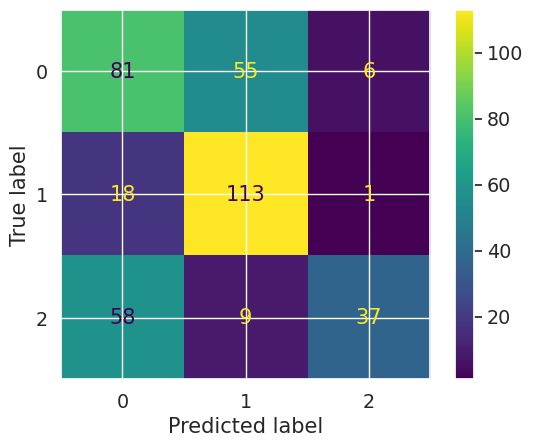

{'R. Forest': 61.111111111111114}


In [ ]:
def randomForest(X_train, X_test, y_train, y_test, methodDict):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import RandomizedSearchCV
    from scipy.stats import randint
    import pandas as pd

    # Initialize the RandomForestClassifier with default parameters
    forest = RandomForestClassifier()

    # Determine the number of features
    featuresSize = len(feature_cols)

    # Define the parameter grid for RandomizedSearchCV
    param_dist = {
        "n_estimators": [10, 20, 50, 100],  # Include different values for n_estimators
        "max_depth": [3, None],
        "max_features": randint(1, featuresSize),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }

    # Perform RandomizedSearchCV
    tuning = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=10, cv=5, random_state=1)
    tuning.fit(X_train, y_train)

    # Get the best parameters
    best_params = tuning.best_params_
    print(f"Best Parameters: {best_params}")

    # Build and fit the model with the best parameters
    best_forest = RandomForestClassifier(
        n_estimators=best_params.get('n_estimators', 100),
        max_depth=best_params.get('max_depth', None),
        max_features=best_params.get('max_features', 'auto'),
        min_samples_split=best_params.get('min_samples_split', 2),
        min_samples_leaf=best_params.get('min_samples_leaf', 1),
        criterion=best_params.get('criterion', 'gini'),
        random_state=1
    )
    my_forest = best_forest.fit(X_train, y_train)

    # Make predictions
    y_pred_class = my_forest.predict(X_test)

    # Create a DataFrame for the results
    results = pd.DataFrame({
        'Index': range(len(y_pred_class)),  # Use range for indices
        'Treatment': y_pred_class
    })

    print('********************Results********************')
    print(results)
    results.to_csv('results.csv', index=False)

    print('########### Random Forests ###############')

    # Evaluate the model
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    # Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

# Example usage
# Assuming X_train, X_test, y_train, y_test are already defined and feature_cols is defined
methodDict = {}
randomForest(X_train, X_test, y_train, y_test, methodDict)
print(methodDict)


In [ ]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')

    plt.show()

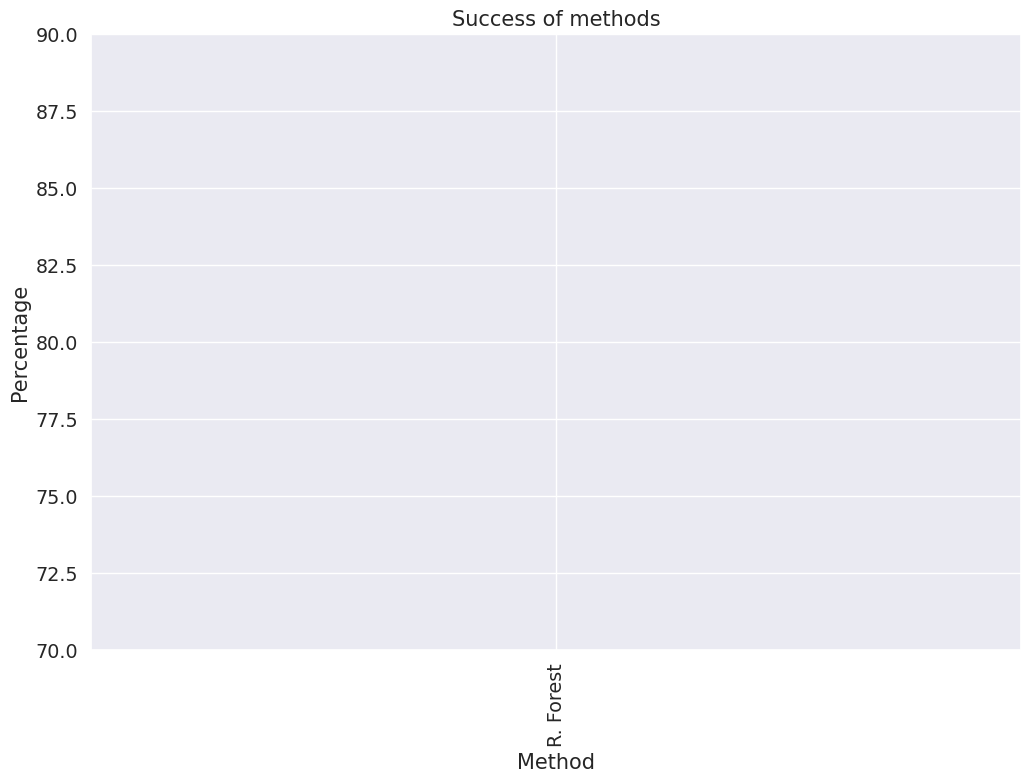

In [ ]:
plotSuccess()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
pd.set_option('mode.chained_assignment', None)

In [ ]:
df = pd.read_csv('Mental health Depression disorder Data.csv', index_col='index', low_memory=False)
df.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [ ]:
df.dtypes

,0
Entity,object
Code,object
Year,object
Schizophrenia (%),object
Bipolar disorder (%),object
Eating disorders (%),object
Anxiety disorders (%),float64
Drug use disorders (%),float64
Depression (%),float64
Alcohol use disorders (%),float64


In [ ]:
df.duplicated().sum()

9718

In [ ]:
duplicated_data = df[df.duplicated(keep='first')==True]
duplicated_data.count()


,0
Entity,9718
Code,9474
Year,9718
Schizophrenia (%),0
Bipolar disorder (%),0
Eating disorders (%),9718
Anxiety disorders (%),0
Drug use disorders (%),0
Depression (%),0
Alcohol use disorders (%),0


In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df[df.isna().any(axis=1)==True]

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
112,Andean Latin America,NaN,1990,0.195471,0.870564,0.28782,4.217677,0.608921,2.621781,1.748912
113,Andean Latin America,NaN,1991,0.195484,0.870876,0.289362,4.220261,0.610489,2.631717,1.743910
114,Andean Latin America,NaN,1992,0.195497,0.871174,0.290563,4.222587,0.611990,2.639932,1.738703
115,Andean Latin America,NaN,1993,0.195523,0.871482,0.291833,4.224721,0.613995,2.646096,1.733697
116,Andean Latin America,NaN,1994,0.195569,0.871823,0.293111,4.226690,0.616448,2.651022,1.729266
...,...,...,...,...,...,...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
col = ['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)']
c_df = df[col]
c_df.head()

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [ ]:
c_df.isna().any(axis=0).sum()

7

In [ ]:
c_df.dropna(axis=0, inplace=True)

In [ ]:
c_df.isna().sum()

,0
Entity,0
Year,0
Schizophrenia (%),0
Bipolar disorder (%),0
Eating disorders (%),0
Anxiety disorders (%),0
Drug use disorders (%),0
Depression (%),0
Alcohol use disorders (%),0


In [ ]:
checkTable = pd.DataFrame({
    'Unique':df.nunique(),
    'null':df.isna().sum(),
    'null percent':(df.isna().sum())/len(df)*100,
    'Type':df.dtypes.values
})

checkTable

,Unique,null,null percent,Type
Entity,276,0,0.000000,object
Code,236,5168,5.228917,object
Year,259,0,0.000000,object
Schizophrenia (%),25661,72960,73.820003,object
Bipolar disorder (%),19358,79429,80.365255,object
Eating disorders (%),72657,8317,8.415035,object
Anxiety disorders (%),6457,92367,93.455760,float64
Drug use disorders (%),6435,92367,93.455760,float64
Depression (%),6460,92367,93.455760,float64
Alcohol use disorders (%),6459,92367,93.455760,float64


In [ ]:
checkTable = pd.DataFrame({
    'Unique':df.nunique(),
    'null':df.isna().sum(),
    'null percent':(df.isna().sum())/len(df)*100,
    'Type':df.dtypes.values
})

checkTable

,Unique,null,null percent,Type
Entity,276,0,0.000000,object
Code,236,5168,5.228917,object
Year,259,0,0.000000,object
Schizophrenia (%),25661,72960,73.820003,object
Bipolar disorder (%),19358,79429,80.365255,object
Eating disorders (%),72657,8317,8.415035,object
Anxiety disorders (%),6457,92367,93.455760,float64
Drug use disorders (%),6435,92367,93.455760,float64
Depression (%),6460,92367,93.455760,float64
Alcohol use disorders (%),6459,92367,93.455760,float64


In [ ]:
def convert(x):
    if type(x)!=float:
        if x[0] in ['0','1','2','3','4','5','6','7','8','9']:
            return float(x)
        return float(0)
    return x

for i in c_df.columns[2:]:
    c_df[i]=c_df[i].apply(convert)

In [ ]:
for i in c_df.columns[2:]:
    print(i)

Schizophrenia (%)
Bipolar disorder (%)
Eating disorders (%)
Anxiety disorders (%)
Drug use disorders (%)
Depression (%)
Alcohol use disorders (%)


In [ ]:
#Grouping averages:
avg = c_df.groupby('Entity', as_index = False).agg({'Schizophrenia (%)':'mean', 'Bipolar disorder (%)':'mean','Eating disorders (%)':'mean', 'Anxiety disorders (%)':'mean', 'Drug use disorders (%)':'mean', 'Depression (%)':'mean', 'Alcohol use disorders (%)':'mean'})

In [ ]:
#Checking that all required columns are in 'avg':
for i in avg.columns[1:]:
    print(i)

Schizophrenia (%)
Bipolar disorder (%)
Eating disorders (%)
Anxiety disorders (%)
Drug use disorders (%)
Depression (%)
Alcohol use disorders (%)


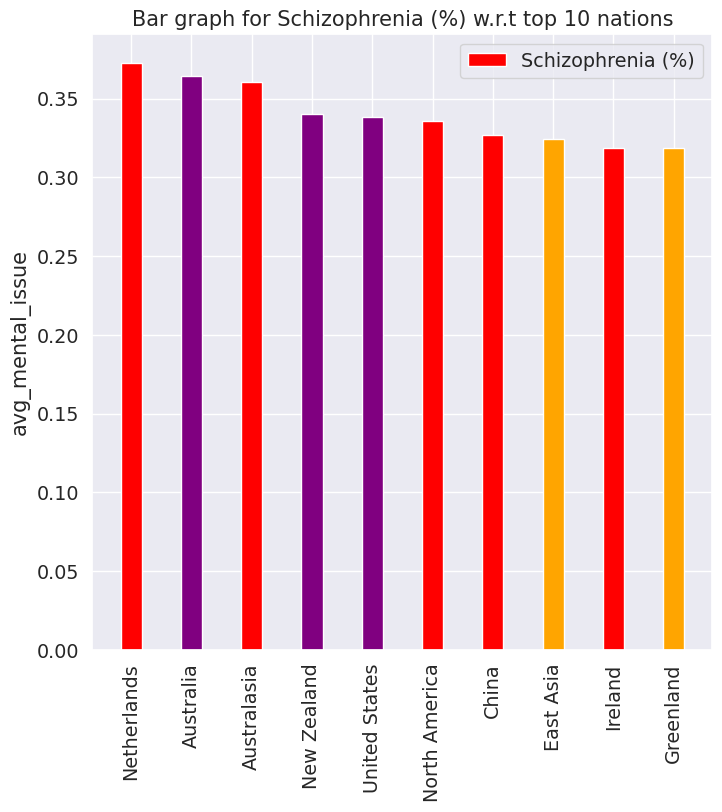

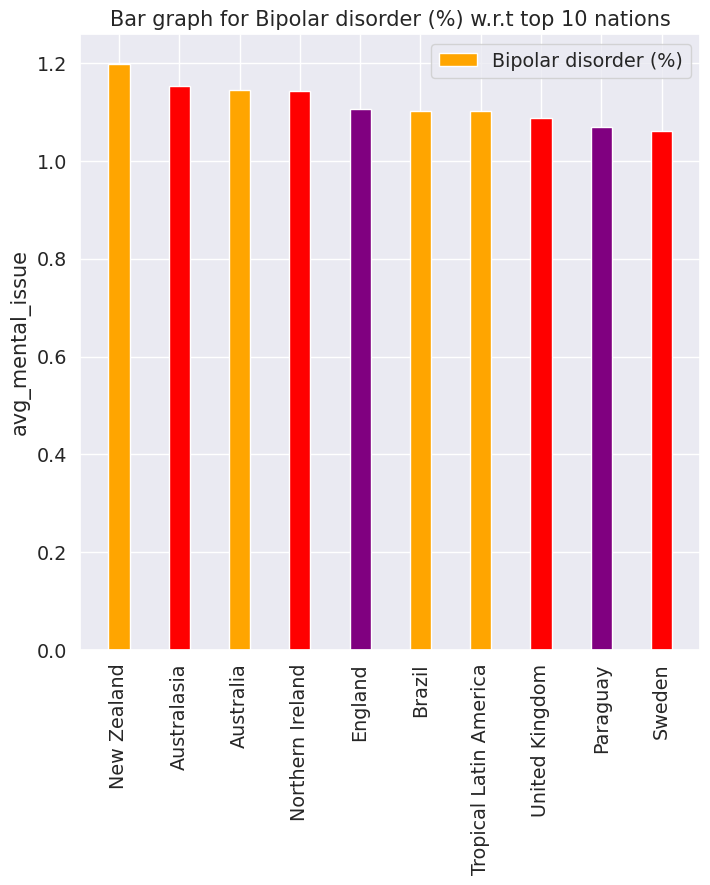

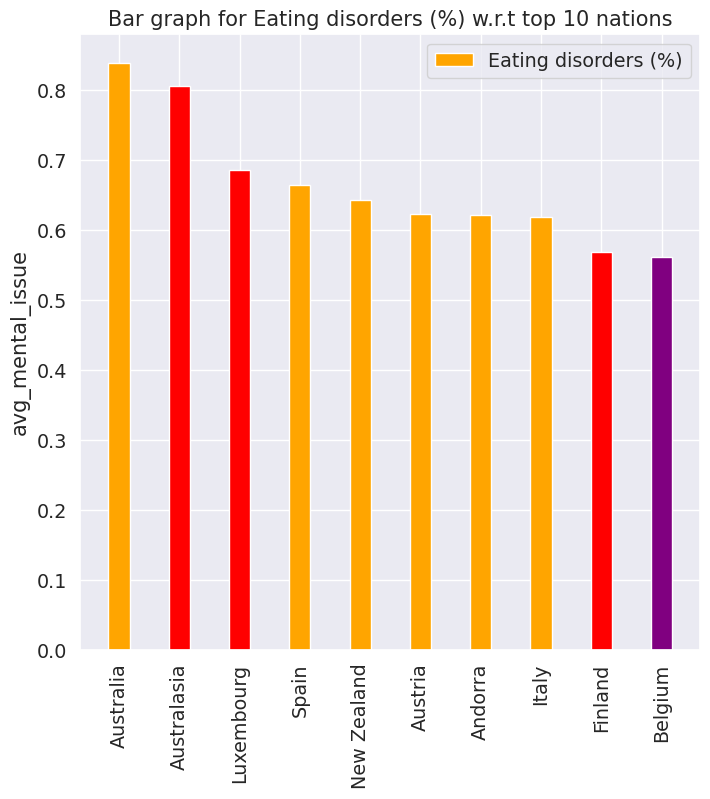

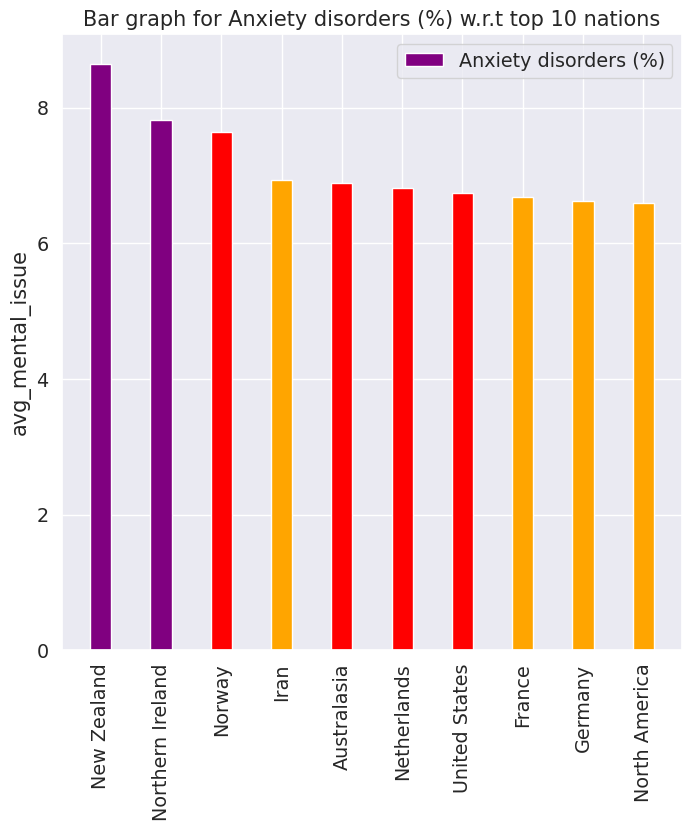

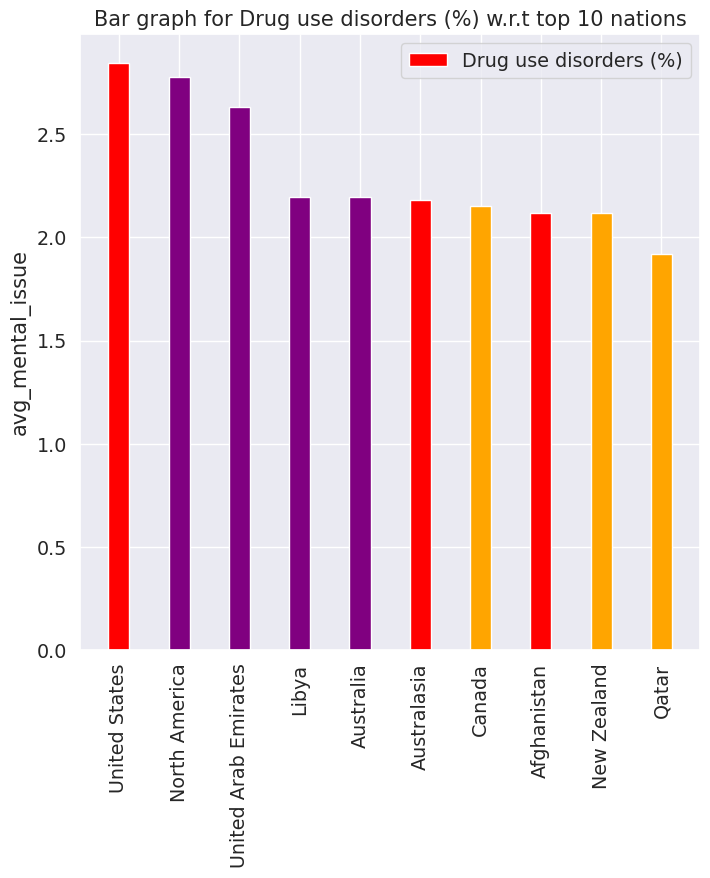

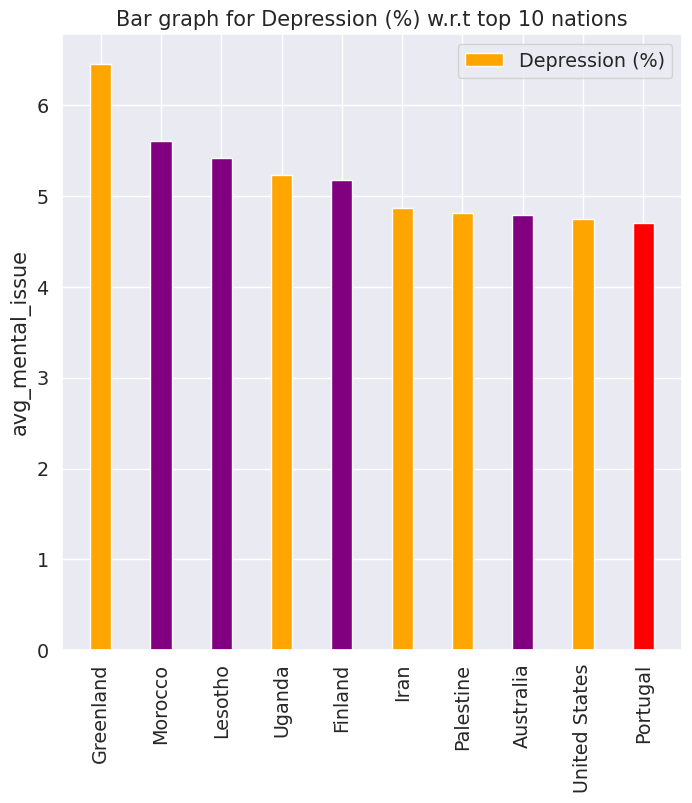

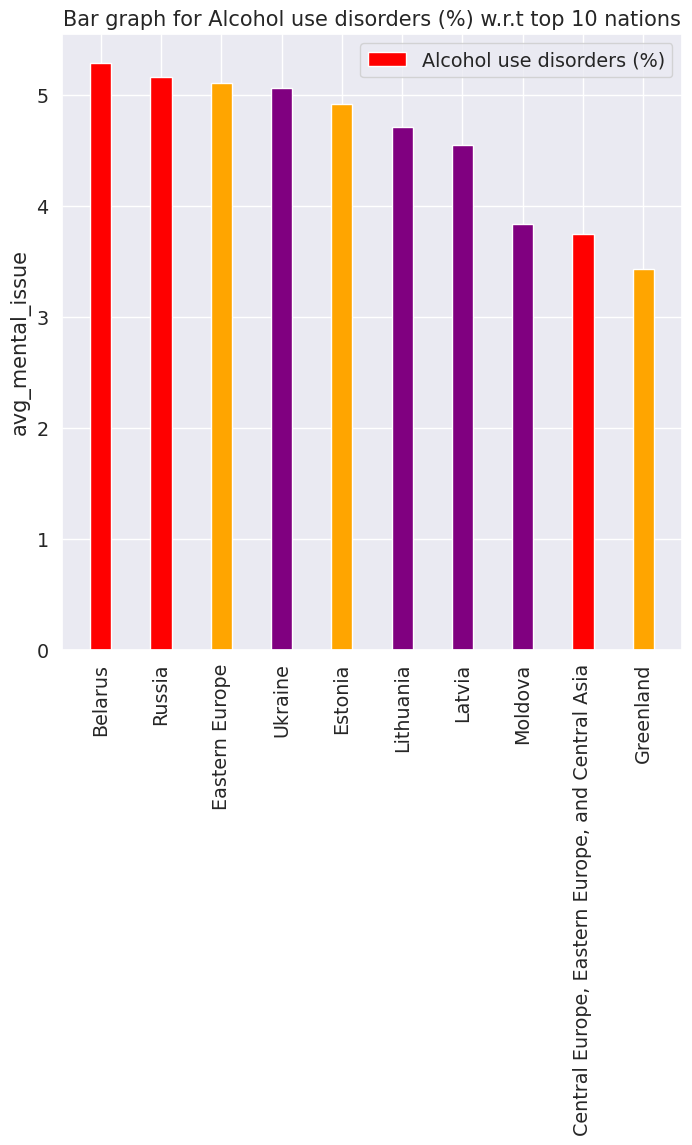

In [ ]:
colors = ['red', 'orange', 'purple']

for i in avg.columns[1:]:
    top10Nations = avg.sort_values(by=i, ascending=False).head(10)

    #Generating random colors for bars in the figure:
    bar_colors = []
    for j in range(20):
        bar_colors.append(random.choice(colors))

    fig, ax = plt.subplots(figsize=(8,8))
    ax.bar(top10Nations['Entity'],top10Nations[i] , width=0.35, label=i, color=bar_colors)

    ax.set_ylabel('avg_mental_issue')
    ax.set_title('Bar graph for '+str(i)+ ' w.r.t top 10 nations')
    plt.xticks(rotation=90)
    ax.legend()

    plt.show()

Estimated coefficients:
b0: 5.112869852932488
b1: -0.06931437718052329


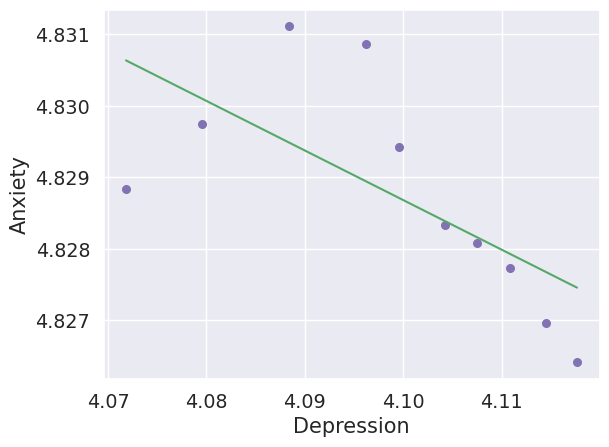

In [ ]:
col= ['Year','Depression (%)','Anxiety disorders (%)']
mdata= df[col].head(10)
mdata.rename(columns = {'Depression (%)':'Depression', 'Anxiety disorders (%)':'Anxiety'}, inplace = True)
mdata
x = np.asarray(mdata.Depression.values)
y = np.asarray(mdata.Anxiety.values)
def estimate(x, y):
    n = np.size(x)

    xmean = np.mean(x)
    ymean = np.mean(y)

    xy = np.sum(y*x) - n*ymean*xmean
    xx = np.sum(x*x) - n*xmean*xmean

    b1 = xy / xx
    temp = b1*xmean
    b0 = ymean-temp

    return (b0, b1)

def plotting(x, y, b):
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    ypredict = b[0] + b[1]*x

    plt.plot(x, ypredict, color = "g")

    plt.xlabel('Depression')
    plt.ylabel('Anxiety')

    plt.show()

def model():

    b = estimate(x, y)

    print("Estimated coefficients:")
    print("b0: "+ str(b[0]))
    print("b1: "+ str(b[1]))

    plotting(x, y, b)

model()